In [9]:
import pandas as pd
import re 
from glob import glob

In [10]:
def config_by_filename(f):
    exptype = "tsfresh" if "tsfresh" in f else "raw"
    p = re.compile("(\d+)min_")
    m = p.search(f)
    winsize = m.group(1)
    winconfig = "notcentered" if "notcentered" in f else "centered"
    
    return exptype, winsize, winconfig

In [11]:
files = glob("./pytorch/all_results*")
len(files)

26

In [12]:
dfs = []
for f in files:
    df_tmp = pd.read_csv(f)
    row = df_tmp.sort_values(by="loss").head(1)
    
    exptype, winsize, winconfig = config_by_filename(f)
    row["exptype"] = exptype
    row["winsize"] = winsize
    row["winconfig"] = winconfig
    
    dfs.append(row)
df = pd.concat(dfs)
#df = pd.read_csv("./all_results_expexp_manyTo1_raw_trials50.csv")

In [13]:
df = df.sort_values("mcc_main_y", ascending=False).reset_index(drop=True)
df

,trial_id,loss,mcc_main_y,acc_main_y,prec_main_y,rec_main_y,f1_main_y,time_this_iter_s,done,timesteps_total,...,config.loss_fnct,config.main_weight,config.cnn_layers,config.cnn_kernel_size,exptype,winsize,winconfig,MAE_percentage_y,MSE_percentage_y,r2_percentage_y
0,a56ec_00016,0.332164,0.655931,0.867751,0.882687,0.942438,0.863494,76.863428,True,NaN,...,[<class 'torch.nn.modules.loss.BCEWithLogitsLo...,1.000000,1,5,tsfresh,20,centered,NaN,NaN,NaN
1,31765_00005,0.325053,0.650427,0.872249,0.892619,0.941531,0.868430,60.015007,True,NaN,...,[<class 'torch.nn.modules.loss.BCEWithLogitsLo...,1.000000,1,6,tsfresh,40,centered,NaN,NaN,NaN
2,a88ef_00006,0.354080,0.642221,0.856827,0.882854,0.920814,0.854336,64.699660,True,NaN,...,[<class 'torch.nn.modules.loss.BCEWithLogitsLo...,1.000000,1,2,tsfresh,10,centered,NaN,NaN,NaN
3,db21a_00001,0.360568,0.637966,0.855968,0.881473,0.921919,0.853234,162.177852,True,NaN,...,[<class 'torch.nn.modules.loss.BCEWithLogitsLo...,1.000000,1,7,tsfresh,10,centered,NaN,NaN,NaN
4,3211f_00012,0.356266,0.637247,0.858253,0.872056,0.939621,0.853266,257.985743,True,NaN,...,[<class 'torch.nn.modules.loss.BCEWithLogitsLo...,1.000000,2,3,tsfresh,10,notcentered,NaN,NaN,NaN
5,88dc2_00000,1.554697,0.633471,0.856604,0.888760,0.916485,0.854656,87.148081,True,NaN,...,[<class 'torch.nn.modules.loss.BCEWithLogitsLo...,0.939198,2,4,tsfresh,20,centered,71.540009,6712.824707,-3.073037
6,b6f6a_00011,0.348921,0.621958,0.858266,0.863679,0.956121,0.850045,175.201222,True,NaN,...,[<class 'torch.nn.modules.loss.BCEWithLogitsLo...,1.000000,3,10,tsfresh,20,notcentered,NaN,NaN,NaN
7,f39a6_00001,1.174104,0.619083,0.860126,0.888488,0.928504,0.856772,145.369167,True,NaN,...,[<class 'torch.nn.modules.loss.BCEWithLogitsLo...,0.944765,1,3,raw,40,centered,73.355415,6724.496094,-3.865096
8,29c09_00009,0.346161,0.614284,0.860586,0.879117,0.942137,0.854898,63.646805,True,NaN,...,[<class 'torch.nn.modules.loss.BCEWithLogitsLo...,1.000000,2,6,raw,40,centered,NaN,NaN,NaN
9,732ff_00010,0.436379,0.610405,0.859460,0.877193,0.943108,0.853396,66.570263,True,NaN,...,[<class 'torch.nn.modules.loss.BCEWithLogitsLo...,0.996828,1,6,tsfresh,40,centered,73.355415,6724.496094,-3.865096


# MCC comparision for NNs

<AxesSubplot:xlabel='exptype', ylabel='mcc_main_y'>

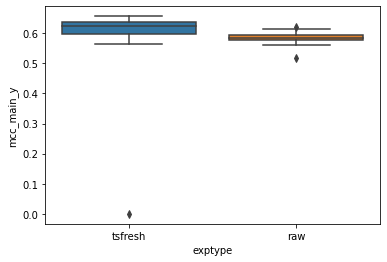

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.boxplot(x='exptype', y='mcc_main_y', data=df)

<AxesSubplot:xlabel='winsize', ylabel='mcc_main_y'>

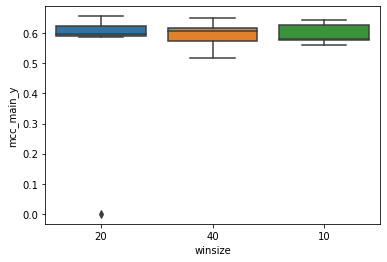

In [15]:
sns.boxplot(x='winsize', y='mcc_main_y', data=df)

<AxesSubplot:xlabel='winconfig', ylabel='mcc_main_y'>

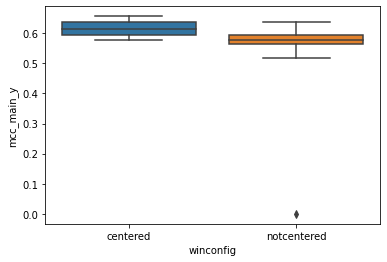

In [16]:
sns.boxplot(x='winconfig', y='mcc_main_y', data=df)

In [17]:
df.iloc[0]#["experiment_tag"]

trial_id                                                             a56ec_00016
loss                                                                    0.332164
mcc_main_y                                                              0.655931
acc_main_y                                                              0.867751
prec_main_y                                                             0.882687
rec_main_y                                                              0.942438
f1_main_y                                                               0.863494
time_this_iter_s                                                         76.8634
done                                                                        True
timesteps_total                                                              NaN
episodes_total                                                               NaN
training_iteration                                                            11
experiment_id               

In [20]:
#df[]

df[(df["config.use_cnn"] == "[True]") & (df["exptype"] == "tsfresh") & (df["winsize"] == "20")]

KeyError: 'config.use_cnn'

In [21]:
df.iloc[0]

trial_id                                                             a56ec_00016
loss                                                                    0.332164
mcc_main_y                                                              0.655931
acc_main_y                                                              0.867751
prec_main_y                                                             0.882687
rec_main_y                                                              0.942438
f1_main_y                                                               0.863494
time_this_iter_s                                                         76.8634
done                                                                        True
timesteps_total                                                              NaN
episodes_total                                                               NaN
training_iteration                                                            11
experiment_id               

# PyCaret Results

In [22]:
#df = pd.read_csv("./ml_predictions/sleep_ml_catboost_test.csv.gz")
files = glob("./pycaret/sleep_ml_*_test.csv.gz")

dfs = []
for f in files:
    dfs.append(pd.read_csv(f))
    df = pd.concat(dfs)

df.sort_values("MCC", ascending=False)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,model,test,X_shape,y_train_shape,y_test_shape,exp,featset
0,Light Gradient Boosting Machine,0.9018,0.9285,0.9592,0.9140,0.9360,0.7258,0.7297,lightgbm,True,1021182,1021182,102614,40min_centered,tsfresh
0,Light Gradient Boosting Machine,0.8948,0.9288,0.9574,0.9041,0.9300,0.7190,0.7238,lightgbm,True,1114067,1114067,112497,20min_centered,tsfresh
0,Light Gradient Boosting Machine,0.8981,0.9218,0.9561,0.9120,0.9335,0.7157,0.7194,lightgbm,True,1021182,1021182,102614,40min_centered,raw
0,Extra Trees Classifier,0.8922,0.9211,0.9539,0.9037,0.9282,0.7131,0.7173,et,True,1114067,1114067,112497,20min_centered,tsfresh
0,Light Gradient Boosting Machine,0.8918,0.9194,0.9568,0.9011,0.9281,0.7104,0.7157,lightgbm,True,1114067,1114067,112497,20min_centered,raw
0,Logistic Regression,0.8917,0.9261,0.9557,0.9018,0.9280,0.7107,0.7156,lr,True,1114067,1114067,112497,20min_centered,tsfresh
0,Random Forest Classifier,0.8910,0.9222,0.9529,0.9031,0.9273,0.7101,0.7142,rf,True,1114067,1114067,112497,20min_centered,tsfresh
0,Random Forest Classifier,0.8961,0.9236,0.9568,0.9091,0.9324,0.7089,0.7132,rf,True,1021182,1021182,102614,40min_centered,tsfresh
0,Extra Trees Classifier,0.8958,0.9222,0.9565,0.9090,0.9322,0.7081,0.7123,et,True,1021182,1021182,102614,40min_centered,tsfresh
0,Logistic Regression,0.8954,0.9252,0.9585,0.9071,0.9321,0.7057,0.7108,lr,True,1021182,1021182,102614,40min_centered,tsfresh


# MCC for ML models

{'whiskers': [<matplotlib.lines.Line2D at 0x7fbfbec07cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbfbed63610>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbfbef85d60>,
 'medians': [<matplotlib.lines.Line2D at 0x7fbfbed45a00>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fbfbee59520>,
 'means': []}

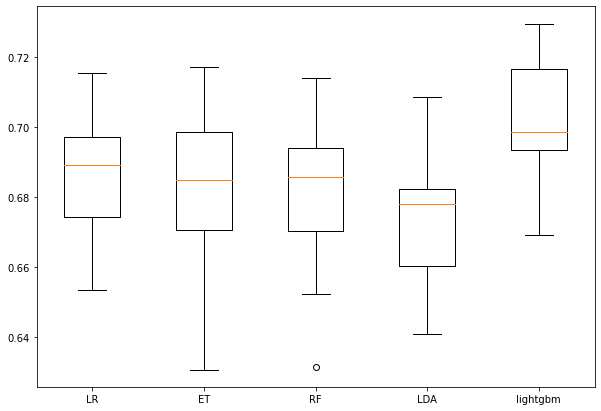

In [24]:
LR = df[df['Model']=='Logistic Regression']['MCC']
ET = df[df['Model']=='Extra Trees Classifier']['MCC']
RF = df[df['Model']=='Random Forest Classifier']['MCC']
LDA = df[df['Model']=='Linear Discriminant Analysis']['MCC']
lightgbm = df[df['Model']=='Light Gradient Boosting Machine']['MCC']

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.boxplot([LR, ET, RF, LDA, lightgbm], labels=['LR', 'ET', 'RF', 'LDA', 'lightgbm'])


{'whiskers': [<matplotlib.lines.Line2D at 0x7fbfbf5ee340>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbfbf5ee9d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbfbf4dffa0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fbfbf5fa0d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fbfbf5fa430>,
 'means': []}

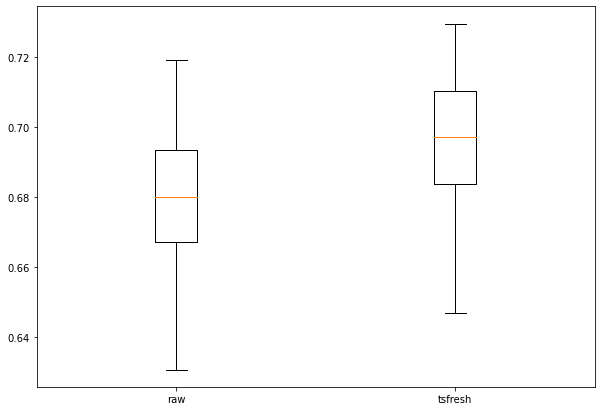

In [25]:
raw = df[df['featset']=='raw']['MCC']
tsfresh = df[df['featset']=='tsfresh']['MCC']


fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.boxplot([raw, tsfresh], labels=['raw', 'tsfresh'])


{'whiskers': [<matplotlib.lines.Line2D at 0x7fbfbf75d730>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbfbf75ddf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbfbf75d3d0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fbfbf76a4f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fbfbf76a850>,
 'means': []}

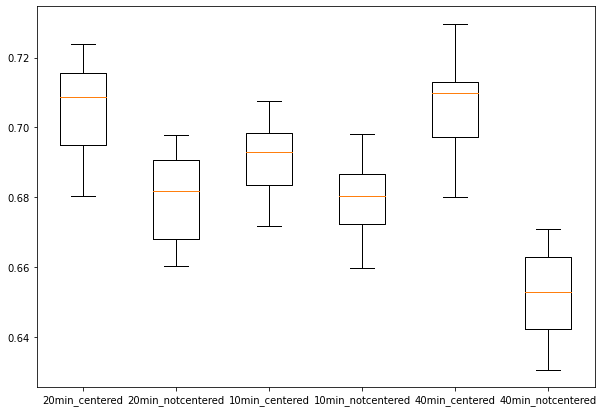

In [26]:
# exp
twenty_min_centered = df[df['exp']=='20min_centered']['MCC']
twenty_min_notcentered = df[df['exp']=='20min_notcentered']['MCC']
ten_min_centered = df[df['exp']=='10min_centered']['MCC']
ten_min_notcentered = df[df['exp']=='10min_notcentered']['MCC']
fourty_min_centered = df[df['exp']=='40min_centered']['MCC']
fourty_min_notcentered = df[df['exp']=='40min_notcentered']['MCC']


fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.boxplot([twenty_min_centered, twenty_min_notcentered, ten_min_centered, ten_min_notcentered, fourty_min_centered, fourty_min_notcentered], labels=['20min_centered', '20min_notcentered', '10min_centered', '10min_notcentered', '40min_centered', '40min_notcentered'])


In [23]:
# What we could have are boxplots for the different dimensions that we are inspecting:
# 3 boxplots: Featset, ML Model, winsize